# 셀프주유소는 정말 저렴할까?
- 오피넷 검색

In [45]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

In [46]:
driver = webdriver.Chrome('/Users/daeun/Desktop/dev/chromedriver')
driver.get("https://www.opinet.co.kr/user/main/mainView.do")
time.sleep(2)

In [47]:
driver.find_element_by_css_selector('.ic_m1').click()  #클릭

In [48]:
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_css_selector('option')
gu_names=[gu.text for gu in gu_list]
del gu_names[0]
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [49]:
gu = gu_names[0]
region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
region.send_keys(gu)

In [50]:
#엑셀저장
#driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [51]:
#25개의 데이터 엑셀 저장
for gu in gu_names:
    region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(2)

In [52]:
driver.close()

### 구별 회발유 가격에 대한 데이터 정리

In [72]:
import pandas as pd 
from glob import glob

In [73]:
file = glob('/Users/daeun/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2듦
듦df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1519,1309,990
1,서울특별시,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),현대오일뱅크,02-3492-7371,Y,-,1524,1314,-
2,서울특별시,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,1750,1524,1314,1000
3,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1524,1324,-
4,서울특별시,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),S-OIL,02-906-5104,Y,-,1524,1314,1000


In [79]:
#25개의 파일을 읽어 하나의 데이터프레임으로 만듦
raw = []
for file in glob('/Users/daeun/Downloads/지역*.xls'):
    df = pd.read_excel(file, header=2)
    raw.append(df)

station_raw = pd.concat(raw)
station_raw.info()
station_raw.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 9
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      487 non-null    object
 1   상호      487 non-null    object
 2   주소      487 non-null    object
 3   상표      487 non-null    object
 4   전화번호    487 non-null    object
 5   셀프여부    487 non-null    object
 6   고급휘발유   487 non-null    object
 7   휘발유     487 non-null    object
 8   경유      487 non-null    object
 9   실내등유    487 non-null    object
dtypes: object(10)
memory usage: 41.9+ KB


,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),현대오일뱅크,02-955-5185,N,-,1519,1309,990
1,서울특별시,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),현대오일뱅크,02-3492-7371,Y,-,1524,1314,-
2,서울특별시,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,1750,1524,1314,1000
3,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1524,1324,-
4,서울특별시,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),S-OIL,02-906-5104,Y,-,1524,1314,1000


In [78]:
stations = pd.DataFrame({
    '상호' : station_raw['상호'],
    '주소' : station_raw['주소'],
    '가격' : station_raw['휘발유'],
    '셀프' : station_raw['셀프여부'],
    '상표' : station_raw['상표']
})

stations.head()

,상호,주소,가격,셀프,상표
0,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1519,N,현대오일뱅크
1,현대오일뱅크㈜직영 도봉현대셀프주유소,서울 도봉구 도봉로 941 (도봉동),1524,Y,현대오일뱅크
2,구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),1524,Y,S-OIL
3,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),1524,Y,S-OIL
4,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),1524,Y,S-OIL


In [95]:
stations['구'] = [addr.split()[1] for addr in station_raw['주소']]
stations.tail()

,상호,주소,가격,셀프,상표,구
5,현대오일뱅크(주)직영 사당셀프주유소,서울 동작구 동작대로 73 (사당동),1599,Y,현대오일뱅크,동작구
6,현대오일뱅크(주)직영 동작주유소,서울 동작구 상도로 403 (상도동),1604,N,현대오일뱅크,동작구
7,대성산업(주) 노량진주유소,서울 동작구 노량진로 172,1628,N,GS칼텍스,동작구
8,(주)성림에너지 남성주유소,서울 동작구 동작대로 135 (사당동),1629,Y,GS칼텍스,동작구
9,살피재주유소,서울 동작구 상도로 334,1695,N,SK에너지,동작구


In [92]:
stations['구'].unique()

array(['도봉구', '마포구', '광진구', '중랑구', '관악구', '서대문구', '노원구', '강서구', '양천구',
       '종로구', '서초구', '성동구', '중구', '영등포구', '강북구', '용산구', '강동구', '성북구',
       '송파구', '은평구', '동대문구', '강남구', '금천구', '구로구', '동작구'], dtype=object)

In [96]:
stations = stations[ stations['가격'] != '-' ]

In [98]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      474 non-null    object
 1   주소      474 non-null    object
 2   가격      474 non-null    object
 3   셀프      474 non-null    object
 4   상표      474 non-null    object
 5   구       474 non-null    object
dtypes: object(6)
memory usage: 35.9+ KB


In [100]:
stations['가격'] = pd.to_numeric(stations['가격'])
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      474 non-null    object
 1   주소      474 non-null    object
 2   가격      474 non-null    int64 
 3   셀프      474 non-null    object
 4   상표      474 non-null    object
 5   구       474 non-null    object
dtypes: int64(1), object(5)
memory usage: 35.9+ KB
<ipython-input-100-9ef1b9b42b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = pd.to_numeric(stations['가격'])


### 셀프 주유소가 정말 저렴한지 확인

In [105]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [106]:
mpl.rcParams['axes.unicode_minus'] = False
font_path = '/System/Library/Fonts/Supplemental/AppleGothic.ttf'
plt.rc('font', family='AppleGothic')

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

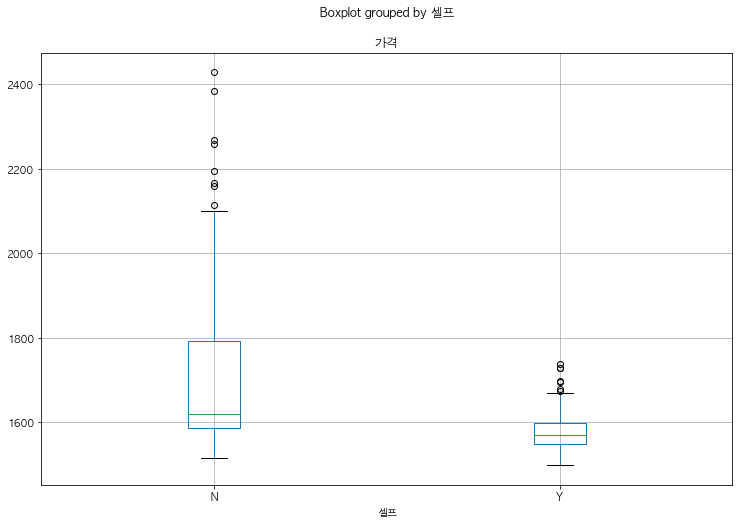

In [108]:
stations.boxplot(column = '가격', by = '셀프', figsize=(12,8))

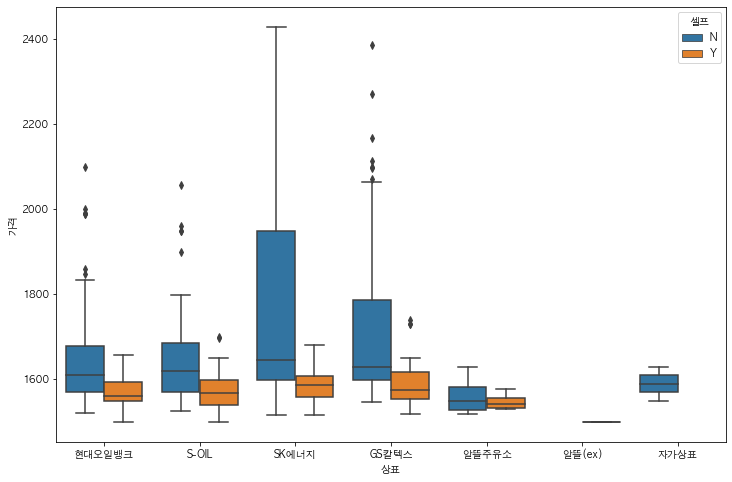

In [110]:
# 상표별로 확인
plt.figure(figsize=(12,8))
sns.boxplot(x='상표',y='가격',hue='셀프',data=stations)
plt.show()

In [111]:
## 서울시 구별 휘발유 가격 확인

In [120]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [121]:
# 가격이 비싼 주유소 Top5
stations.sort_values(by='가격',ascending=False).head(5)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2269,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259,N,SK에너지,중구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구


In [122]:
# 가격이 착한 주유소 Top5
stations.sort_values(by='가격').head(5)

,상호,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498,Y,알뜰(ex),서초구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1499,Y,현대오일뱅크,강북구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1499,Y,S-OIL,강북구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1514,N,SK에너지,양천구
0,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515,Y,현대오일뱅크,영등포구


In [126]:
gu_data = stations.groupby('구')[['가격']].mean()
gu_data

,가격
구,
강남구,1784.486486
강동구,1677.562500
강북구,1533.384615
강서구,1593.242424
관악구,1619.312500
광진구,1596.214286
구로구,1603.318182
금천구,1568.083333
노원구,1613.000000


In [ ]:
geo_path = '../04.지도_공공API/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [ ]:
map = folium.Map(
    location=[37.5502, 126.982],
    zoom_start=11, tiles='Stamen Tower'
)
map.choropleth(
geo_data = geo_data,
data=gu_data.가격,
columns=[gu_data.index, gu_data.가격],
fill_color='PuRd',

)
map